## Section 8. Model Evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


## 문제 1. ROC Curve 와 AUC 구하기

아래 코드는 
IRIS 데이터 셋을 이용해  Iris Versicolour 와 Iris Virginica 을 구별하는 코드 입니다. 

아래 코드를 수행 했을 때 나온 데이터프레임에는 각 데이터 별로 예측값과 정답값에 대한 정보가 담겨져 있습니다. 이를 이용해 **ROC Curve** 와 **AUC ** 을 구하고 시각화 합니다. 

참고 
- 음성 label 은 0 , Versicolour <br>
- 양성 label 은 1 , Virginica 입니다. 

In [2]:
# 우선 실행해주세요
np.random.seed(1) # 같은 결과를 보장하기 위함
# load Iris dataset 
iris = load_iris()

# XS, YS 
xs = iris['data']
ys = iris['target']
ys_name = iris['target_names']

# extract Versicolour , Virginica dataset 
indices = np.where((ys == 1) | (ys == 2))
xs = xs[indices]
ys = ys[indices]
ys = np.where(ys==1, 0, 1) 

# stop broadcasting
ys = ys.reshape([-1, 1])

# Normalization
xs_norm = (xs - xs.min(axis=0)) / (xs.max(axis=0) - xs.min(axis=0))

# Xs 와 np.ones 을 concatenate for broadcasting  
xs_concat = np.concatenate([xs_norm, 
                            np.ones(shape=[xs_norm.shape[0], 1])], 
                           axis=1)

# Weight 
weight = np.random.normal(size=[xs_concat.shape[-1], 1])

# Training 
lr = 0.01
for i in range(100):
    pred = np.matmul(xs_concat, weight)
    pred = 1 / (1 + np.exp(-pred))

    # Gradient Descent
    diff = pred - ys
    gradients = np.matmul(xs_concat.T, diff)
    weight = weight - gradients*lr
    
    # Accuracy 
    acc = np.mean((pred > 0.5) == ys)
print("Final Accuracy : {:2.2f}%".format(acc*100))
df = pd.DataFrame({
    "Prediction" : pred[:,0],
    "True Label" : ys[:,0]
})

Final Accuracy : 95.00%


In [3]:
df.sample(10)

,Prediction,True Label
69,0.511604,1
46,0.168278,0
58,0.814259,1
12,0.140934,0
73,0.647265,1
98,0.835785,1
31,0.081775,0
53,0.697934,1
65,0.862991,1
96,0.744327,1


#### 답안지 입력란
* 아래에 답을 서술하여 주세요


In [4]:
def get_pr(cut_value):
    yhats = np.where(pred > cut_value, True, False)
    
    tp = (ys & yhats).sum()
    fn = (ys & ~yhats).sum()

    fp = (~ys & yhats).sum()
    tn = (~ys & ~yhats).sum()

    tpr = tp/(tp+fn)
    fpr = fp/(fp+tn)

    return tpr, fpr

In [5]:
def get_auc(xs, ys):
    fprs, tprs = xs, ys
    prev_fpr = fprs[0]
    prev_tpr = tprs[0]
    
    auc = 0
    for fpr, tpr in zip(fprs[1:], tprs[1:]):
        segment = (prev_fpr-fpr)*(prev_tpr+tpr)/2
        auc += segment
        prev_fpr, prev_tpr = fpr, tpr
    
    return auc

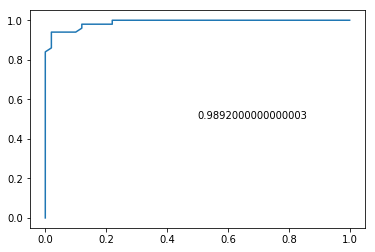

In [6]:
# 정답을 입력해주세요

cut_values = np.linspace(0., 1., 100)

tprs = []
fprs = []
for cut_value in cut_values:
    tpr, fpr = get_pr(cut_value)
    tprs.append(tpr)
    fprs.append(fpr)
    
auc = get_auc(fprs, tprs)
plt.text(0.5, 0.5, auc)
plt.plot(fprs, tprs)

#### 정답 확인

정답 : AUC , ROC curve 는 아래와 같은 그림이 나와야 정답입니다

![Imgur](https://i.imgur.com/nOOc7Va.png)